# Import and Initialization

In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
# standard numerical library imports
import numpy as np

import matplotlib.pyplot as plt
import pandas
import os

from pfn_utils import *

2022-09-28 10:23:21.679827: I tensorflow/stream_executor/platform/default/dso_loader.cc:49] Successfully opened dynamic library libcudart.so.10.1


In [3]:
# configs
train, val, test = 0.6, 0.3, 0.1
Phi_sizes, F_sizes = (256, 256, 256), (256, 256, 256)
num_epoch = 500
batch_size = 1000

In [4]:
data_base_dir = "/global/home/users/yifengh3/VAE/vec_data/recon_data"
raw_b_signals = np.load(os.path.join(data_base_dir, "fixed_reconstructed_B_signal_vector.npz")) 
raw_hv_signals = np.load(os.path.join(data_base_dir, "reconstructed_hv_vector.npz")) 

In [5]:
print(list(raw_b_signals.keys()))

['data', 'recon', 'beta']


# Original Data

In [6]:
signal1 = raw_b_signals["data"]
signal2 = raw_hv_signals["data"]

In [7]:
pfn_original, hist1, original_training_data = train_pfn(signal1, signal2)

signal_1 data shape: (173270, 50, 3)
signal_2 data shape: (155841, 50, 3)
shape of X: (329111, 150)
shape of Y: (329111,)
Weight for background: 0.95
Weight for signal: 1.06
Finished preprocessing
shape of X: (329111, 50, 3)
shape of Y: (329111,)
Model summary:


2022-09-28 10:23:24.354328: I tensorflow/compiler/jit/xla_cpu_device.cc:41] Not creating XLA devices, tf_xla_enable_xla_devices not set
2022-09-28 10:23:24.355831: I tensorflow/stream_executor/platform/default/dso_loader.cc:49] Successfully opened dynamic library libcuda.so.1
2022-09-28 10:23:24.388820: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1720] Found device 0 with properties: 
pciBusID: 0000:01:00.0 name: Quadro RTX 6000 computeCapability: 7.5
coreClock: 1.77GHz coreCount: 72 deviceMemorySize: 23.65GiB deviceMemoryBandwidth: 625.94GiB/s
2022-09-28 10:23:24.388860: I tensorflow/stream_executor/platform/default/dso_loader.cc:49] Successfully opened dynamic library libcudart.so.10.1
2022-09-28 10:23:24.390203: I tensorflow/stream_executor/platform/default/dso_loader.cc:49] Successfully opened dynamic library libcublas.so.10
2022-09-28 10:23:24.390232: I tensorflow/stream_executor/platform/default/dso_loader.cc:49] Successfully opened dynamic library libcublasLt.so.10
2022-0

Model: "model"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input (InputLayer)              [(None, None, 3)]    0                                            
__________________________________________________________________________________________________
tdist_0 (TimeDistributed)       (None, None, 256)    1024        input[0][0]                      
__________________________________________________________________________________________________
activation (Activation)         (None, None, 256)    0           tdist_0[0][0]                    
__________________________________________________________________________________________________
tdist_1 (TimeDistributed)       (None, None, 256)    65792       activation[0][0]                 
______________________________________________________________________________________________

2022-09-28 10:23:25.419299: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:116] None of the MLIR optimization passes are enabled (registered 2)
2022-09-28 10:23:25.419767: I tensorflow/core/platform/profile_utils/cpu_utils.cc:112] CPU Frequency: 2994530000 Hz
2022-09-28 10:23:25.819269: I tensorflow/stream_executor/platform/default/dso_loader.cc:49] Successfully opened dynamic library libcublas.so.10


198/198 - 3s - loss: 7.8301 - acc: 0.8342 - val_loss: 0.5090 - val_acc: 0.9057
Epoch 2/200
198/198 - 2s - loss: 0.4715 - acc: 0.8936 - val_loss: 0.2636 - val_acc: 0.9031
Epoch 3/200
198/198 - 2s - loss: 0.4565 - acc: 0.8906 - val_loss: 0.5088 - val_acc: 0.8692
Epoch 4/200
198/198 - 2s - loss: 0.2423 - acc: 0.9195 - val_loss: 0.1877 - val_acc: 0.9327
Epoch 5/200
198/198 - 2s - loss: 0.2118 - acc: 0.9253 - val_loss: 0.1797 - val_acc: 0.9341
Epoch 6/200
198/198 - 2s - loss: 0.1839 - acc: 0.9329 - val_loss: 0.2028 - val_acc: 0.9193
Epoch 7/200
198/198 - 2s - loss: 0.1740 - acc: 0.9365 - val_loss: 0.2999 - val_acc: 0.9006
Epoch 8/200
198/198 - 2s - loss: 0.2039 - acc: 0.9274 - val_loss: 0.1866 - val_acc: 0.9326
Epoch 9/200
198/198 - 2s - loss: 0.1683 - acc: 0.9380 - val_loss: 0.1623 - val_acc: 0.9399
Epoch 10/200
198/198 - 2s - loss: 0.1669 - acc: 0.9391 - val_loss: 0.1635 - val_acc: 0.9404
Epoch 11/200
198/198 - 2s - loss: 0.1945 - acc: 0.9301 - val_loss: 0.2254 - val_acc: 0.9246
Epoch 12/

Epoch 87/200
198/198 - 2s - loss: 0.1005 - acc: 0.9622 - val_loss: 0.1287 - val_acc: 0.9536
Epoch 88/200
198/198 - 2s - loss: 0.0997 - acc: 0.9624 - val_loss: 0.1301 - val_acc: 0.9540
Epoch 89/200
198/198 - 2s - loss: 0.0996 - acc: 0.9624 - val_loss: 0.1116 - val_acc: 0.9588
Epoch 90/200
198/198 - 2s - loss: 0.0970 - acc: 0.9635 - val_loss: 0.1102 - val_acc: 0.9591
Epoch 91/200
198/198 - 2s - loss: 0.0977 - acc: 0.9633 - val_loss: 0.1121 - val_acc: 0.9582
Epoch 92/200
198/198 - 2s - loss: 0.1003 - acc: 0.9621 - val_loss: 0.1157 - val_acc: 0.9568
Epoch 93/200
198/198 - 2s - loss: 0.0952 - acc: 0.9641 - val_loss: 0.1134 - val_acc: 0.9586
Epoch 94/200
198/198 - 2s - loss: 0.0949 - acc: 0.9642 - val_loss: 0.1120 - val_acc: 0.9592
Epoch 95/200
198/198 - 2s - loss: 0.0954 - acc: 0.9644 - val_loss: 0.1103 - val_acc: 0.9592

Epoch 00095: ReduceLROnPlateau reducing learning rate to 0.00010000000838432616.
Epoch 96/200
198/198 - 2s - loss: 0.0890 - acc: 0.9666 - val_loss: 0.1081 - val_acc: 0.959


PFN AUC: 0.9936949956579688



/global/home/users/yifengh3/VAE/EMD_VAE/PFN/pfn_utils.py:147: RuntimeWarning: divide by zero encountered in true_divide
  plt.plot(pfn_tp, 1/pfn_fp, '-', color='black', label='PFN')
/global/home/users/yifengh3/VAE/EMD_VAE/PFN/pfn_utils.py:148: RuntimeWarning: divide by zero encountered in true_divide
  plt.plot(pfn_tp, 1/pfn_tp, '-', color='red', label='random')


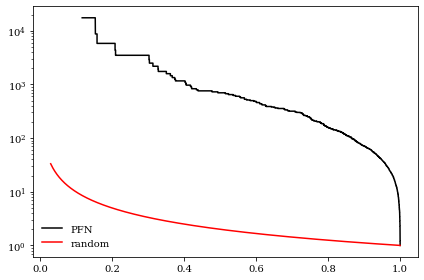

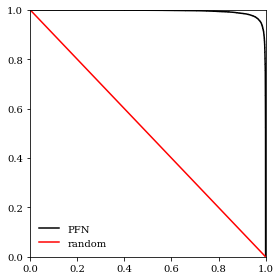

In [8]:
analysis(pfn_original,original_training_data[1][2], original_training_data[1][-1])

In [9]:
ori_preds = pfn_original.predict(original_training_data[1][2], batch_size=10000)
original_roc_info = roc_curve(original_training_data[1][-1][:,1], ori_preds[:,1])

# Test of recon data

In [10]:
log_betas = raw_b_signals["beta"]

In [11]:
beta_idx = np.logical_and(log_betas<0, log_betas>-5)
new_betas = log_betas[beta_idx]
new_betas = new_betas
print(new_betas)

[-0.14285715 -0.2857143  -0.42857143 -0.5714286  -0.71428573 -0.85714287
 -1.         -1.1428572  -1.2857143  -1.4285715  -1.5714285  -1.7142857
 -1.8571428  -2.         -2.142857   -2.2857144  -2.4285715  -2.5714285
 -2.7142856  -2.857143   -3.         -3.142857   -3.2857144  -3.4285715
 -3.5714285  -3.7142856  -3.857143   -4.         -4.142857   -4.285714
 -4.428571   -4.571429   -4.714286   -4.857143  ]


In [12]:
signal_1_recons = raw_b_signals["recon"][beta_idx]
signal_2_recons = raw_hv_signals["recon"][beta_idx]

In [ ]:
result = []
for signal_1, signal_2 in zip(signal_1_recons,signal_2_recons):
    result.append(train_pfn(signal_1, signal_2))

signal_1 data shape: (173270, 50, 3)
signal_2 data shape: (155841, 50, 3)
shape of X: (329111, 150)
shape of Y: (329111,)
Weight for background: 0.95
Weight for signal: 1.06
Finished preprocessing
shape of X: (329111, 50, 3)
shape of Y: (329111,)
Model summary:
Model: "model_1"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input (InputLayer)              [(None, None, 3)]    0                                            
__________________________________________________________________________________________________
tdist_0 (TimeDistributed)       (None, None, 256)    1024        input[0][0]                      
__________________________________________________________________________________________________
activation_7 (Activation)       (None, None, 256)    0           tdist_0[0][0]                    
____________________________

Epoch 43/200
198/198 - 2s - loss: 0.4338 - acc: 0.7911 - val_loss: 0.4312 - val_acc: 0.7780
Epoch 44/200
198/198 - 2s - loss: 0.4228 - acc: 0.7959 - val_loss: 0.4328 - val_acc: 0.7916
Epoch 45/200
198/198 - 2s - loss: 0.4145 - acc: 0.8010 - val_loss: 0.4062 - val_acc: 0.8082
Epoch 46/200
198/198 - 2s - loss: 0.4120 - acc: 0.8022 - val_loss: 0.4020 - val_acc: 0.8041

Epoch 00046: ReduceLROnPlateau reducing learning rate to 0.0002511886574257803.
Epoch 47/200
198/198 - 2s - loss: 0.3894 - acc: 0.8167 - val_loss: 0.3737 - val_acc: 0.8234
Epoch 48/200
198/198 - 2s - loss: 0.3863 - acc: 0.8189 - val_loss: 0.4036 - val_acc: 0.8064
Epoch 49/200
198/198 - 2s - loss: 0.3933 - acc: 0.8139 - val_loss: 0.3844 - val_acc: 0.8175
Epoch 50/200
198/198 - 2s - loss: 0.3850 - acc: 0.8188 - val_loss: 0.3666 - val_acc: 0.8324
Epoch 51/200
198/198 - 2s - loss: 0.3833 - acc: 0.8200 - val_loss: 0.3631 - val_acc: 0.8357
Epoch 52/200
198/198 - 2s - loss: 0.3848 - acc: 0.8192 - val_loss: 0.3791 - val_acc: 0.8232

Epoch 127/200
198/198 - 2s - loss: 0.2728 - acc: 0.8865 - val_loss: 0.2754 - val_acc: 0.8853
Epoch 128/200
198/198 - 2s - loss: 0.2753 - acc: 0.8851 - val_loss: 0.2798 - val_acc: 0.8826
Epoch 129/200
198/198 - 2s - loss: 0.2745 - acc: 0.8853 - val_loss: 0.2716 - val_acc: 0.8872
Epoch 130/200
198/198 - 2s - loss: 0.2740 - acc: 0.8860 - val_loss: 0.2824 - val_acc: 0.8798
Epoch 131/200
198/198 - 2s - loss: 0.2733 - acc: 0.8858 - val_loss: 0.2764 - val_acc: 0.8841
Epoch 132/200
198/198 - 2s - loss: 0.2728 - acc: 0.8863 - val_loss: 0.2735 - val_acc: 0.8865
Epoch 133/200
198/198 - 2s - loss: 0.2761 - acc: 0.8841 - val_loss: 0.2708 - val_acc: 0.8881
Epoch 134/200
198/198 - 2s - loss: 0.2724 - acc: 0.8862 - val_loss: 0.2774 - val_acc: 0.8860
Epoch 135/200
198/198 - 2s - loss: 0.2716 - acc: 0.8875 - val_loss: 0.2904 - val_acc: 0.8778
Epoch 136/200
198/198 - 2s - loss: 0.2748 - acc: 0.8849 - val_loss: 0.2733 - val_acc: 0.8869
Epoch 137/200
198/198 - 2s - loss: 0.2737 - acc: 0.8858 - val_loss: 0.

Epoch 1/200
198/198 - 2s - loss: 9.3666 - acc: 0.6822 - val_loss: 0.6214 - val_acc: 0.7490
Epoch 2/200
198/198 - 2s - loss: 0.5210 - acc: 0.7579 - val_loss: 0.3838 - val_acc: 0.8473
Epoch 3/200
198/198 - 2s - loss: 0.4375 - acc: 0.8014 - val_loss: 1.2048 - val_acc: 0.5565
Epoch 4/200
198/198 - 2s - loss: 0.3993 - acc: 0.8192 - val_loss: 0.3514 - val_acc: 0.8345
Epoch 5/200
198/198 - 2s - loss: 0.3754 - acc: 0.8311 - val_loss: 0.4368 - val_acc: 0.7784
Epoch 6/200
198/198 - 2s - loss: 0.3731 - acc: 0.8350 - val_loss: 0.4542 - val_acc: 0.7862
Epoch 7/200
198/198 - 2s - loss: 0.3591 - acc: 0.8411 - val_loss: 0.3612 - val_acc: 0.8408
Epoch 8/200
198/198 - 2s - loss: 0.3357 - acc: 0.8532 - val_loss: 0.3514 - val_acc: 0.8538
Epoch 9/200
198/198 - 2s - loss: 0.3229 - acc: 0.8581 - val_loss: 0.2813 - val_acc: 0.8888
Epoch 10/200
198/198 - 2s - loss: 0.3171 - acc: 0.8618 - val_loss: 0.2856 - val_acc: 0.8847
Epoch 11/200
198/198 - 2s - loss: 0.3205 - acc: 0.8612 - val_loss: 0.2887 - val_acc: 0.88

198/198 - 2s - loss: 0.2331 - acc: 0.9068 - val_loss: 0.2365 - val_acc: 0.9055
Epoch 84/200
198/198 - 2s - loss: 0.2334 - acc: 0.9066 - val_loss: 0.2325 - val_acc: 0.9069
Epoch 85/200
198/198 - 2s - loss: 0.2331 - acc: 0.9068 - val_loss: 0.2323 - val_acc: 0.9070
Epoch 86/200
198/198 - 2s - loss: 0.2326 - acc: 0.9075 - val_loss: 0.2316 - val_acc: 0.9073
Epoch 87/200
198/198 - 2s - loss: 0.2333 - acc: 0.9067 - val_loss: 0.2340 - val_acc: 0.9063
Epoch 88/200
198/198 - 2s - loss: 0.2329 - acc: 0.9069 - val_loss: 0.2315 - val_acc: 0.9073
Epoch 89/200
198/198 - 2s - loss: 0.2334 - acc: 0.9069 - val_loss: 0.2311 - val_acc: 0.9080
Epoch 90/200
198/198 - 2s - loss: 0.2323 - acc: 0.9074 - val_loss: 0.2310 - val_acc: 0.9081
Epoch 91/200
198/198 - 2s - loss: 0.2314 - acc: 0.9076 - val_loss: 0.2322 - val_acc: 0.9073
Epoch 92/200
198/198 - 2s - loss: 0.2315 - acc: 0.9079 - val_loss: 0.2314 - val_acc: 0.9083
Epoch 93/200
198/198 - 2s - loss: 0.2314 - acc: 0.9079 - val_loss: 0.2318 - val_acc: 0.9071
E

Epoch 169/200
198/198 - 2s - loss: 0.2209 - acc: 0.9130 - val_loss: 0.2201 - val_acc: 0.9129
Epoch 170/200
198/198 - 2s - loss: 0.2197 - acc: 0.9134 - val_loss: 0.2201 - val_acc: 0.9133
Epoch 171/200
198/198 - 2s - loss: 0.2199 - acc: 0.9134 - val_loss: 0.2204 - val_acc: 0.9125
Epoch 172/200
198/198 - 2s - loss: 0.2203 - acc: 0.9131 - val_loss: 0.2230 - val_acc: 0.9115
Epoch 173/200
198/198 - 2s - loss: 0.2203 - acc: 0.9134 - val_loss: 0.2251 - val_acc: 0.9104
Epoch 174/200
198/198 - 2s - loss: 0.2201 - acc: 0.9135 - val_loss: 0.2226 - val_acc: 0.9114
Epoch 175/200
198/198 - 2s - loss: 0.2197 - acc: 0.9135 - val_loss: 0.2203 - val_acc: 0.9124
Epoch 176/200
198/198 - 2s - loss: 0.2196 - acc: 0.9137 - val_loss: 0.2191 - val_acc: 0.9137
Epoch 177/200
198/198 - 2s - loss: 0.2196 - acc: 0.9136 - val_loss: 0.2188 - val_acc: 0.9138
Epoch 178/200
198/198 - 2s - loss: 0.2205 - acc: 0.9132 - val_loss: 0.2210 - val_acc: 0.9124
Epoch 179/200
198/198 - 2s - loss: 0.2189 - acc: 0.9136 - val_loss: 0.

198/198 - 2s - loss: 0.2331 - acc: 0.9084 - val_loss: 0.2210 - val_acc: 0.9147
Epoch 24/200
198/198 - 2s - loss: 0.2337 - acc: 0.9080 - val_loss: 0.2228 - val_acc: 0.9139
Epoch 25/200
198/198 - 2s - loss: 0.2290 - acc: 0.9102 - val_loss: 0.2212 - val_acc: 0.9123
Epoch 26/200
198/198 - 2s - loss: 0.2317 - acc: 0.9089 - val_loss: 0.2167 - val_acc: 0.9158
Epoch 27/200
198/198 - 2s - loss: 0.2337 - acc: 0.9078 - val_loss: 0.2358 - val_acc: 0.9086
Epoch 28/200
198/198 - 2s - loss: 0.2312 - acc: 0.9090 - val_loss: 0.2164 - val_acc: 0.9174
Epoch 29/200
198/198 - 2s - loss: 0.2304 - acc: 0.9096 - val_loss: 0.2235 - val_acc: 0.9158
Epoch 30/200
198/198 - 2s - loss: 0.2287 - acc: 0.9104 - val_loss: 0.2299 - val_acc: 0.9089
Epoch 31/200
198/198 - 2s - loss: 0.2262 - acc: 0.9117 - val_loss: 0.2302 - val_acc: 0.9092
Epoch 32/200
198/198 - 2s - loss: 0.2286 - acc: 0.9097 - val_loss: 0.2240 - val_acc: 0.9135
Epoch 33/200
198/198 - 2s - loss: 0.2427 - acc: 0.9038 - val_loss: 0.2492 - val_acc: 0.8996



Epoch 1/200
198/198 - 2s - loss: 11.9319 - acc: 0.7692 - val_loss: 0.4988 - val_acc: 0.8772
Epoch 2/200
198/198 - 2s - loss: 0.6330 - acc: 0.8411 - val_loss: 0.4869 - val_acc: 0.8769
Epoch 3/200
198/198 - 2s - loss: 0.4539 - acc: 0.8593 - val_loss: 0.2722 - val_acc: 0.8903
Epoch 4/200
198/198 - 2s - loss: 0.2916 - acc: 0.8877 - val_loss: 0.4444 - val_acc: 0.8430
Epoch 5/200
198/198 - 2s - loss: 0.2796 - acc: 0.8947 - val_loss: 0.3473 - val_acc: 0.8553
Epoch 6/200
198/198 - 2s - loss: 0.2702 - acc: 0.8954 - val_loss: 0.2412 - val_acc: 0.8995
Epoch 7/200
198/198 - 2s - loss: 0.2333 - acc: 0.9095 - val_loss: 0.2503 - val_acc: 0.9046
Epoch 8/200
198/198 - 2s - loss: 0.2512 - acc: 0.9035 - val_loss: 0.2357 - val_acc: 0.9037
Epoch 9/200
198/198 - 2s - loss: 0.2332 - acc: 0.9091 - val_loss: 0.2107 - val_acc: 0.9228
Epoch 10/200
198/198 - 2s - loss: 0.2275 - acc: 0.9126 - val_loss: 0.2019 - val_acc: 0.9244
Epoch 11/200
198/198 - 2s - loss: 0.2309 - acc: 0.9113 - val_loss: 0.2541 - val_acc: 0.8

Epoch 1/200
198/198 - 2s - loss: 7.0872 - acc: 0.8164 - val_loss: 1.2641 - val_acc: 0.8201
Epoch 2/200
198/198 - 2s - loss: 0.7932 - acc: 0.8603 - val_loss: 0.7607 - val_acc: 0.8028
Epoch 3/200
198/198 - 2s - loss: 0.3833 - acc: 0.8862 - val_loss: 0.2585 - val_acc: 0.9136
Epoch 4/200
198/198 - 2s - loss: 0.2511 - acc: 0.9077 - val_loss: 0.2030 - val_acc: 0.9261
Epoch 5/200
198/198 - 2s - loss: 0.2332 - acc: 0.9136 - val_loss: 0.2173 - val_acc: 0.9234
Epoch 6/200
198/198 - 2s - loss: 0.2573 - acc: 0.9072 - val_loss: 0.2237 - val_acc: 0.9143
Epoch 7/200
198/198 - 2s - loss: 0.2249 - acc: 0.9158 - val_loss: 0.2080 - val_acc: 0.9243
Epoch 8/200
198/198 - 2s - loss: 0.2157 - acc: 0.9191 - val_loss: 0.2178 - val_acc: 0.9146
Epoch 9/200
198/198 - 2s - loss: 0.2071 - acc: 0.9218 - val_loss: 0.2242 - val_acc: 0.9125

Epoch 00009: ReduceLROnPlateau reducing learning rate to 0.000630957374449059.
Epoch 10/200
198/198 - 2s - loss: 0.1971 - acc: 0.9266 - val_loss: 0.1911 - val_acc: 0.9291
Epoch 11/

Epoch 1/200
198/198 - 2s - loss: 5.1988 - acc: 0.8435 - val_loss: 0.9921 - val_acc: 0.8422
Epoch 2/200
198/198 - 2s - loss: 0.6049 - acc: 0.8791 - val_loss: 0.5049 - val_acc: 0.8730
Epoch 3/200
198/198 - 2s - loss: 0.4553 - acc: 0.8910 - val_loss: 0.2277 - val_acc: 0.9182
Epoch 4/200
198/198 - 2s - loss: 0.2307 - acc: 0.9167 - val_loss: 0.2145 - val_acc: 0.9249
Epoch 5/200
198/198 - 2s - loss: 0.2249 - acc: 0.9183 - val_loss: 0.1980 - val_acc: 0.9267
Epoch 6/200
198/198 - 2s - loss: 0.2122 - acc: 0.9220 - val_loss: 0.2106 - val_acc: 0.9233
Epoch 7/200
198/198 - 2s - loss: 0.1951 - acc: 0.9286 - val_loss: 0.2263 - val_acc: 0.9196
Epoch 8/200
198/198 - 2s - loss: 0.2007 - acc: 0.9260 - val_loss: 0.1845 - val_acc: 0.9327
Epoch 9/200
198/198 - 2s - loss: 0.1960 - acc: 0.9280 - val_loss: 0.2081 - val_acc: 0.9238
Epoch 10/200
198/198 - 2s - loss: 0.1888 - acc: 0.9309 - val_loss: 0.1951 - val_acc: 0.9283
Epoch 11/200
198/198 - 2s - loss: 0.1871 - acc: 0.9312 - val_loss: 0.2199 - val_acc: 0.91

Epoch 4/200
198/198 - 2s - loss: 0.2628 - acc: 0.9145 - val_loss: 0.1873 - val_acc: 0.9332
Epoch 5/200
198/198 - 2s - loss: 0.2295 - acc: 0.9200 - val_loss: 0.1782 - val_acc: 0.9352
Epoch 6/200
198/198 - 2s - loss: 0.1944 - acc: 0.9297 - val_loss: 0.1803 - val_acc: 0.9336
Epoch 7/200
198/198 - 2s - loss: 0.2107 - acc: 0.9248 - val_loss: 0.1917 - val_acc: 0.9313
Epoch 8/200
198/198 - 2s - loss: 0.2015 - acc: 0.9272 - val_loss: 0.2238 - val_acc: 0.9184
Epoch 9/200
198/198 - 2s - loss: 0.1899 - acc: 0.9314 - val_loss: 0.1858 - val_acc: 0.9337
Epoch 10/200
198/198 - 2s - loss: 0.2011 - acc: 0.9281 - val_loss: 0.1739 - val_acc: 0.9356
Epoch 11/200
198/198 - 2s - loss: 0.1852 - acc: 0.9323 - val_loss: 0.1791 - val_acc: 0.9339
Epoch 12/200
198/198 - 2s - loss: 0.1826 - acc: 0.9332 - val_loss: 0.2069 - val_acc: 0.9251
Epoch 13/200
198/198 - 2s - loss: 0.1815 - acc: 0.9338 - val_loss: 0.2213 - val_acc: 0.9176
Epoch 14/200
198/198 - 2s - loss: 0.1844 - acc: 0.9327 - val_loss: 0.1751 - val_acc: 0

Epoch 4/200
198/198 - 2s - loss: 0.2422 - acc: 0.9165 - val_loss: 0.2582 - val_acc: 0.9228
Epoch 5/200
198/198 - 2s - loss: 0.2300 - acc: 0.9212 - val_loss: 0.2059 - val_acc: 0.9256
Epoch 6/200
198/198 - 2s - loss: 0.1894 - acc: 0.9323 - val_loss: 0.1735 - val_acc: 0.9359
Epoch 7/200
198/198 - 2s - loss: 0.1792 - acc: 0.9351 - val_loss: 0.1687 - val_acc: 0.9378
Epoch 8/200
198/198 - 2s - loss: 0.1805 - acc: 0.9344 - val_loss: 0.1764 - val_acc: 0.9376
Epoch 9/200
198/198 - 2s - loss: 0.1963 - acc: 0.9289 - val_loss: 0.1706 - val_acc: 0.9371
Epoch 10/200
198/198 - 2s - loss: 0.1780 - acc: 0.9355 - val_loss: 0.1662 - val_acc: 0.9398
Epoch 11/200
198/198 - 2s - loss: 0.1842 - acc: 0.9338 - val_loss: 0.1778 - val_acc: 0.9369
Epoch 12/200
198/198 - 2s - loss: 0.1751 - acc: 0.9369 - val_loss: 0.1674 - val_acc: 0.9384
Epoch 13/200
198/198 - 2s - loss: 0.1784 - acc: 0.9354 - val_loss: 0.1692 - val_acc: 0.9381
Epoch 14/200
198/198 - 2s - loss: 0.1868 - acc: 0.9323 - val_loss: 0.1856 - val_acc: 0

Epoch 10/200
198/198 - 2s - loss: 0.1732 - acc: 0.9373 - val_loss: 0.1823 - val_acc: 0.9327
Epoch 11/200
198/198 - 2s - loss: 0.1656 - acc: 0.9398 - val_loss: 0.1861 - val_acc: 0.9302
Epoch 12/200
198/198 - 2s - loss: 0.1653 - acc: 0.9403 - val_loss: 0.1634 - val_acc: 0.9403
Epoch 13/200
198/198 - 2s - loss: 0.1653 - acc: 0.9404 - val_loss: 0.1597 - val_acc: 0.9431
Epoch 14/200
198/198 - 2s - loss: 0.1610 - acc: 0.9417 - val_loss: 0.1529 - val_acc: 0.9449
Epoch 15/200
198/198 - 2s - loss: 0.1704 - acc: 0.9384 - val_loss: 0.1603 - val_acc: 0.9419
Epoch 16/200
198/198 - 2s - loss: 0.1639 - acc: 0.9408 - val_loss: 0.1704 - val_acc: 0.9375
Epoch 17/200
198/198 - 2s - loss: 0.1642 - acc: 0.9409 - val_loss: 0.2004 - val_acc: 0.9263
Epoch 18/200
198/198 - 2s - loss: 0.1648 - acc: 0.9404 - val_loss: 0.1601 - val_acc: 0.9411
Epoch 19/200
198/198 - 2s - loss: 2.6183 - acc: 0.8701 - val_loss: 0.1833 - val_acc: 0.9327

Epoch 00019: ReduceLROnPlateau reducing learning rate to 0.000630957374449059.


Epoch 27/200
198/198 - 2s - loss: 0.1527 - acc: 0.9442 - val_loss: 0.1490 - val_acc: 0.9471
Epoch 28/200
198/198 - 2s - loss: 0.1536 - acc: 0.9445 - val_loss: 0.1746 - val_acc: 0.9367
Epoch 29/200
198/198 - 2s - loss: 0.1511 - acc: 0.9454 - val_loss: 0.1501 - val_acc: 0.9462

Epoch 00029: ReduceLROnPlateau reducing learning rate to 0.0003981071838171537.
Epoch 30/200
198/198 - 2s - loss: 0.1459 - acc: 0.9472 - val_loss: 0.1440 - val_acc: 0.9484
Epoch 31/200
198/198 - 2s - loss: 0.1447 - acc: 0.9476 - val_loss: 0.1473 - val_acc: 0.9477
Epoch 32/200
198/198 - 2s - loss: 0.1453 - acc: 0.9475 - val_loss: 0.1728 - val_acc: 0.9374
Epoch 33/200
198/198 - 2s - loss: 0.1454 - acc: 0.9475 - val_loss: 0.1493 - val_acc: 0.9474
Epoch 34/200
198/198 - 2s - loss: 0.1446 - acc: 0.9477 - val_loss: 0.1444 - val_acc: 0.9482
Epoch 35/200
198/198 - 2s - loss: 0.1488 - acc: 0.9460 - val_loss: 0.1457 - val_acc: 0.9480

Epoch 00035: ReduceLROnPlateau reducing learning rate to 0.0002511886574257803.
Epoch 36/2

Epoch 110/200
198/198 - 2s - loss: 0.1282 - acc: 0.9534 - val_loss: 0.1360 - val_acc: 0.9511

Epoch 00110: ReduceLROnPlateau reducing learning rate to 1.5848932274101303e-05.
Epoch 111/200
198/198 - 2s - loss: 0.1270 - acc: 0.9535 - val_loss: 0.1359 - val_acc: 0.9511
Epoch 112/200
198/198 - 2s - loss: 0.1268 - acc: 0.9537 - val_loss: 0.1355 - val_acc: 0.9509
Epoch 113/200
198/198 - 2s - loss: 0.1271 - acc: 0.9537 - val_loss: 0.1362 - val_acc: 0.9511
Epoch 114/200
198/198 - 2s - loss: 0.1270 - acc: 0.9535 - val_loss: 0.1359 - val_acc: 0.9513
Epoch 115/200
198/198 - 2s - loss: 0.1269 - acc: 0.9536 - val_loss: 0.1359 - val_acc: 0.9512

Epoch 00115: ReduceLROnPlateau reducing learning rate to 1.0000000608891671e-05.
Epoch 00115: early stopping
signal_1 data shape: (173270, 50, 3)
signal_2 data shape: (155841, 50, 3)
shape of X: (329111, 150)
shape of Y: (329111,)
Weight for background: 0.95
Weight for signal: 1.06
Finished preprocessing
shape of X: (329111, 50, 3)
shape of Y: (329111,)
Mod


Epoch 00034: ReduceLROnPlateau reducing learning rate to 0.0002511886574257803.
Epoch 35/200
198/198 - 2s - loss: 0.1404 - acc: 0.9495 - val_loss: 0.1501 - val_acc: 0.9464
Epoch 36/200
198/198 - 2s - loss: 0.1422 - acc: 0.9488 - val_loss: 0.1391 - val_acc: 0.9510
Epoch 37/200
198/198 - 2s - loss: 0.1414 - acc: 0.9492 - val_loss: 0.1480 - val_acc: 0.9469
Epoch 38/200
198/198 - 2s - loss: 0.1396 - acc: 0.9500 - val_loss: 0.1399 - val_acc: 0.9499
Epoch 39/200
198/198 - 2s - loss: 0.1412 - acc: 0.9496 - val_loss: 0.1450 - val_acc: 0.9489

Epoch 00039: ReduceLROnPlateau reducing learning rate to 0.00015848933651346973.
Epoch 00039: early stopping
signal_1 data shape: (173270, 50, 3)
signal_2 data shape: (155841, 50, 3)
shape of X: (329111, 150)
shape of Y: (329111,)
Weight for background: 0.95
Weight for signal: 1.06
Finished preprocessing
shape of X: (329111, 50, 3)
shape of Y: (329111,)
Model summary:
Model: "model_12"
_____________________________________________________________________

Epoch 1/200
198/198 - 2s - loss: 10.2263 - acc: 0.8488 - val_loss: 0.3167 - val_acc: 0.9252
Epoch 2/200
198/198 - 2s - loss: 0.6730 - acc: 0.8921 - val_loss: 0.2879 - val_acc: 0.9326
Epoch 3/200
198/198 - 2s - loss: 0.2602 - acc: 0.9217 - val_loss: 0.1741 - val_acc: 0.9375
Epoch 4/200
198/198 - 2s - loss: 0.1845 - acc: 0.9355 - val_loss: 0.1841 - val_acc: 0.9408
Epoch 5/200
198/198 - 2s - loss: 0.1761 - acc: 0.9374 - val_loss: 0.2030 - val_acc: 0.9237
Epoch 6/200
198/198 - 2s - loss: 0.1786 - acc: 0.9368 - val_loss: 0.1476 - val_acc: 0.9473
Epoch 7/200
198/198 - 2s - loss: 0.1649 - acc: 0.9414 - val_loss: 0.2324 - val_acc: 0.9142
Epoch 8/200
198/198 - 2s - loss: 0.1593 - acc: 0.9432 - val_loss: 0.1458 - val_acc: 0.9474
Epoch 9/200
198/198 - 2s - loss: 0.1537 - acc: 0.9450 - val_loss: 0.1496 - val_acc: 0.9477
Epoch 10/200
198/198 - 2s - loss: 0.1566 - acc: 0.9436 - val_loss: 0.1450 - val_acc: 0.9489
Epoch 11/200
198/198 - 2s - loss: 0.1510 - acc: 0.9457 - val_loss: 0.1621 - val_acc: 0.9

Epoch 16/200
198/198 - 2s - loss: 0.1430 - acc: 0.9488 - val_loss: 0.1388 - val_acc: 0.9503

Epoch 00016: ReduceLROnPlateau reducing learning rate to 0.000630957374449059.
Epoch 17/200
198/198 - 2s - loss: 0.1351 - acc: 0.9510 - val_loss: 0.1327 - val_acc: 0.9527
Epoch 18/200
198/198 - 2s - loss: 0.1383 - acc: 0.9499 - val_loss: 0.1298 - val_acc: 0.9539
Epoch 19/200
198/198 - 2s - loss: 0.1353 - acc: 0.9514 - val_loss: 0.1274 - val_acc: 0.9544
Epoch 20/200
198/198 - 2s - loss: 0.1360 - acc: 0.9511 - val_loss: 0.1483 - val_acc: 0.9477
Epoch 21/200
198/198 - 2s - loss: 0.1375 - acc: 0.9501 - val_loss: 0.1272 - val_acc: 0.9541
Epoch 22/200
198/198 - 2s - loss: 0.1341 - acc: 0.9520 - val_loss: 0.1265 - val_acc: 0.9550
Epoch 23/200
198/198 - 2s - loss: 0.1352 - acc: 0.9513 - val_loss: 0.1257 - val_acc: 0.9545
Epoch 24/200
198/198 - 2s - loss: 0.1361 - acc: 0.9507 - val_loss: 0.1277 - val_acc: 0.9543
Epoch 25/200
198/198 - 2s - loss: 0.1399 - acc: 0.9490 - val_loss: 0.1386 - val_acc: 0.9502


198/198 - 2s - loss: 0.1065 - acc: 0.9602 - val_loss: 0.1157 - val_acc: 0.9585
Epoch 98/200
198/198 - 2s - loss: 0.1064 - acc: 0.9606 - val_loss: 0.1156 - val_acc: 0.9585
Epoch 99/200
198/198 - 2s - loss: 0.1065 - acc: 0.9604 - val_loss: 0.1156 - val_acc: 0.9584

Epoch 00099: ReduceLROnPlateau reducing learning rate to 1.0000000608891671e-05.
Epoch 100/200
198/198 - 2s - loss: 0.1057 - acc: 0.9608 - val_loss: 0.1153 - val_acc: 0.9586
Epoch 101/200
198/198 - 2s - loss: 0.1057 - acc: 0.9605 - val_loss: 0.1158 - val_acc: 0.9582
Epoch 102/200
198/198 - 2s - loss: 0.1055 - acc: 0.9609 - val_loss: 0.1153 - val_acc: 0.9586
Epoch 103/200
198/198 - 2s - loss: 0.1054 - acc: 0.9607 - val_loss: 0.1155 - val_acc: 0.9585
Epoch 104/200
198/198 - 2s - loss: 0.1054 - acc: 0.9607 - val_loss: 0.1155 - val_acc: 0.9586

Epoch 00104: ReduceLROnPlateau reducing learning rate to 1e-05.
Epoch 00104: early stopping
signal_1 data shape: (173270, 50, 3)
signal_2 data shape: (155841, 50, 3)
shape of X: (329111, 15

198/198 - 2s - loss: 0.1226 - acc: 0.9553 - val_loss: 0.1259 - val_acc: 0.9548
Epoch 34/200
198/198 - 2s - loss: 0.1228 - acc: 0.9555 - val_loss: 0.1265 - val_acc: 0.9543
Epoch 35/200
198/198 - 2s - loss: 0.1227 - acc: 0.9556 - val_loss: 0.1326 - val_acc: 0.9522
Epoch 36/200
198/198 - 2s - loss: 0.1245 - acc: 0.9553 - val_loss: 0.1310 - val_acc: 0.9542
Epoch 37/200
198/198 - 2s - loss: 0.1215 - acc: 0.9560 - val_loss: 0.1268 - val_acc: 0.9552
Epoch 38/200
198/198 - 2s - loss: 0.1237 - acc: 0.9554 - val_loss: 0.1314 - val_acc: 0.9522

Epoch 00038: ReduceLROnPlateau reducing learning rate to 0.0002511886574257803.
Epoch 39/200
198/198 - 2s - loss: 0.1196 - acc: 0.9569 - val_loss: 0.1227 - val_acc: 0.9559
Epoch 40/200
198/198 - 2s - loss: 0.1176 - acc: 0.9574 - val_loss: 0.1262 - val_acc: 0.9544
Epoch 41/200
198/198 - 2s - loss: 0.1199 - acc: 0.9565 - val_loss: 0.1366 - val_acc: 0.9496
Epoch 42/200
198/198 - 2s - loss: 0.1204 - acc: 0.9564 - val_loss: 0.1245 - val_acc: 0.9544
Epoch 43/200

Epoch 1/200
198/198 - 2s - loss: 10.2506 - acc: 0.8436 - val_loss: 0.4839 - val_acc: 0.9193
Epoch 2/200
198/198 - 2s - loss: 0.4555 - acc: 0.8998 - val_loss: 0.1962 - val_acc: 0.9422
Epoch 3/200
198/198 - 2s - loss: 0.3136 - acc: 0.9128 - val_loss: 0.1684 - val_acc: 0.9438
Epoch 4/200
198/198 - 2s - loss: 0.1855 - acc: 0.9367 - val_loss: 0.1739 - val_acc: 0.9356
Epoch 5/200
198/198 - 2s - loss: 0.1707 - acc: 0.9401 - val_loss: 0.1690 - val_acc: 0.9430
Epoch 6/200
198/198 - 2s - loss: 0.1614 - acc: 0.9430 - val_loss: 0.2441 - val_acc: 0.9192
Epoch 7/200
198/198 - 2s - loss: 0.1769 - acc: 0.9395 - val_loss: 0.1465 - val_acc: 0.9491
Epoch 8/200
198/198 - 2s - loss: 0.1621 - acc: 0.9429 - val_loss: 0.1397 - val_acc: 0.9504
Epoch 9/200
198/198 - 2s - loss: 0.1466 - acc: 0.9482 - val_loss: 0.1403 - val_acc: 0.9498
Epoch 10/200
198/198 - 2s - loss: 0.1397 - acc: 0.9508 - val_loss: 0.1338 - val_acc: 0.9529
Epoch 11/200
198/198 - 2s - loss: 0.1383 - acc: 0.9508 - val_loss: 0.1470 - val_acc: 0.9

Epoch 84/200
198/198 - 2s - loss: 0.1019 - acc: 0.9624 - val_loss: 0.1159 - val_acc: 0.9587
Epoch 85/200
198/198 - 2s - loss: 0.1017 - acc: 0.9625 - val_loss: 0.1192 - val_acc: 0.9576
Epoch 86/200
198/198 - 2s - loss: 0.1019 - acc: 0.9624 - val_loss: 0.1156 - val_acc: 0.9579

Epoch 00086: ReduceLROnPlateau reducing learning rate to 2.5118865283496142e-05.
Epoch 87/200
198/198 - 2s - loss: 0.1000 - acc: 0.9632 - val_loss: 0.1153 - val_acc: 0.9589
Epoch 88/200
198/198 - 2s - loss: 0.1001 - acc: 0.9629 - val_loss: 0.1165 - val_acc: 0.9587
Epoch 89/200
198/198 - 2s - loss: 0.1000 - acc: 0.9629 - val_loss: 0.1161 - val_acc: 0.9588
Epoch 90/200
198/198 - 2s - loss: 0.0999 - acc: 0.9630 - val_loss: 0.1144 - val_acc: 0.9592
Epoch 91/200
198/198 - 2s - loss: 0.0997 - acc: 0.9632 - val_loss: 0.1181 - val_acc: 0.9582

Epoch 00091: ReduceLROnPlateau reducing learning rate to 1.5848932274101303e-05.
Epoch 00091: early stopping
signal_1 data shape: (173270, 50, 3)
signal_2 data shape: (155841, 50, 3

Epoch 32/200
198/198 - 2s - loss: 0.1224 - acc: 0.9560 - val_loss: 0.1257 - val_acc: 0.9547
Epoch 33/200
198/198 - 2s - loss: 0.1248 - acc: 0.9551 - val_loss: 0.1272 - val_acc: 0.9545
Epoch 34/200
198/198 - 2s - loss: 0.1225 - acc: 0.9559 - val_loss: 0.1268 - val_acc: 0.9550
Epoch 35/200
198/198 - 2s - loss: 0.1271 - acc: 0.9541 - val_loss: 0.1294 - val_acc: 0.9549

Epoch 00035: ReduceLROnPlateau reducing learning rate to 0.00015848933651346973.
Epoch 36/200
198/198 - 2s - loss: 0.1194 - acc: 0.9566 - val_loss: 0.1200 - val_acc: 0.9574
Epoch 37/200
198/198 - 2s - loss: 0.1203 - acc: 0.9563 - val_loss: 0.1200 - val_acc: 0.9573
Epoch 38/200
198/198 - 2s - loss: 0.1206 - acc: 0.9563 - val_loss: 0.1262 - val_acc: 0.9554
Epoch 39/200
198/198 - 2s - loss: 0.1218 - acc: 0.9559 - val_loss: 0.1210 - val_acc: 0.9573
Epoch 40/200
198/198 - 2s - loss: 0.1199 - acc: 0.9567 - val_loss: 0.1197 - val_acc: 0.9569
Epoch 41/200
198/198 - 2s - loss: 0.1201 - acc: 0.9564 - val_loss: 0.1253 - val_acc: 0.954

198/198 - 2s - loss: 10.4578 - acc: 0.8371 - val_loss: 1.0229 - val_acc: 0.8073
Epoch 2/200
198/198 - 2s - loss: 0.3374 - acc: 0.9039 - val_loss: 0.1816 - val_acc: 0.9359
Epoch 3/200
198/198 - 2s - loss: 0.3832 - acc: 0.9138 - val_loss: 0.1711 - val_acc: 0.9446
Epoch 4/200
198/198 - 2s - loss: 0.2015 - acc: 0.9299 - val_loss: 0.1511 - val_acc: 0.9482
Epoch 5/200
198/198 - 2s - loss: 0.1712 - acc: 0.9396 - val_loss: 0.1509 - val_acc: 0.9495
Epoch 6/200
198/198 - 2s - loss: 0.1604 - acc: 0.9430 - val_loss: 0.1651 - val_acc: 0.9432
Epoch 7/200
198/198 - 2s - loss: 0.1566 - acc: 0.9445 - val_loss: 0.1413 - val_acc: 0.9516
Epoch 8/200
198/198 - 2s - loss: 0.1568 - acc: 0.9444 - val_loss: 0.1778 - val_acc: 0.9400
Epoch 9/200
198/198 - 2s - loss: 0.1588 - acc: 0.9436 - val_loss: 0.1806 - val_acc: 0.9377
Epoch 10/200
198/198 - 2s - loss: 0.1461 - acc: 0.9477 - val_loss: 0.1329 - val_acc: 0.9531
Epoch 11/200
198/198 - 2s - loss: 0.1566 - acc: 0.9439 - val_loss: 0.1846 - val_acc: 0.9300
Epoch 12

Epoch 1/200
198/198 - 2s - loss: 8.3389 - acc: 0.8507 - val_loss: 0.4091 - val_acc: 0.9118
Epoch 2/200
198/198 - 2s - loss: 0.4658 - acc: 0.9063 - val_loss: 0.1786 - val_acc: 0.9386
Epoch 3/200
198/198 - 2s - loss: 0.3359 - acc: 0.9155 - val_loss: 0.1660 - val_acc: 0.9446
Epoch 4/200
198/198 - 2s - loss: 0.1917 - acc: 0.9340 - val_loss: 0.1561 - val_acc: 0.9456
Epoch 5/200
198/198 - 2s - loss: 0.2280 - acc: 0.9300 - val_loss: 0.1518 - val_acc: 0.9473
Epoch 6/200
198/198 - 2s - loss: 0.1695 - acc: 0.9408 - val_loss: 0.1622 - val_acc: 0.9418
Epoch 7/200
198/198 - 2s - loss: 0.1623 - acc: 0.9436 - val_loss: 0.1409 - val_acc: 0.9501
Epoch 8/200
198/198 - 2s - loss: 0.1553 - acc: 0.9450 - val_loss: 0.1588 - val_acc: 0.9421
Epoch 9/200
198/198 - 2s - loss: 0.1538 - acc: 0.9455 - val_loss: 0.1356 - val_acc: 0.9522
Epoch 10/200
198/198 - 2s - loss: 0.1539 - acc: 0.9456 - val_loss: 0.1440 - val_acc: 0.9502
Epoch 11/200
198/198 - 2s - loss: 0.1501 - acc: 0.9474 - val_loss: 0.1335 - val_acc: 0.95

198/198 - 2s - loss: 0.1047 - acc: 0.9613 - val_loss: 0.1153 - val_acc: 0.9586
Epoch 89/200
198/198 - 2s - loss: 0.1041 - acc: 0.9616 - val_loss: 0.1155 - val_acc: 0.9579
Epoch 90/200
198/198 - 2s - loss: 0.1039 - acc: 0.9616 - val_loss: 0.1147 - val_acc: 0.9586
Epoch 91/200
198/198 - 2s - loss: 0.1040 - acc: 0.9618 - val_loss: 0.1169 - val_acc: 0.9575
Epoch 92/200
198/198 - 2s - loss: 0.1038 - acc: 0.9618 - val_loss: 0.1162 - val_acc: 0.9579
Epoch 93/200
198/198 - 2s - loss: 0.1035 - acc: 0.9618 - val_loss: 0.1160 - val_acc: 0.9577
Epoch 94/200
198/198 - 2s - loss: 0.1035 - acc: 0.9622 - val_loss: 0.1153 - val_acc: 0.9583
Epoch 95/200
198/198 - 2s - loss: 0.1033 - acc: 0.9618 - val_loss: 0.1154 - val_acc: 0.9584

Epoch 00095: ReduceLROnPlateau reducing learning rate to 1.5848932274101303e-05.
Epoch 96/200
198/198 - 2s - loss: 0.1025 - acc: 0.9623 - val_loss: 0.1151 - val_acc: 0.9583
Epoch 97/200
198/198 - 2s - loss: 0.1023 - acc: 0.9623 - val_loss: 0.1156 - val_acc: 0.9582
Epoch 98/20

Epoch 1/200
198/198 - 2s - loss: 8.6172 - acc: 0.8351 - val_loss: 0.6048 - val_acc: 0.9075
Epoch 2/200
198/198 - 2s - loss: 0.8196 - acc: 0.8802 - val_loss: 0.5174 - val_acc: 0.8653
Epoch 3/200
198/198 - 2s - loss: 0.2469 - acc: 0.9217 - val_loss: 0.1806 - val_acc: 0.9404
Epoch 4/200
198/198 - 2s - loss: 0.1872 - acc: 0.9350 - val_loss: 0.2306 - val_acc: 0.9200
Epoch 5/200
198/198 - 2s - loss: 0.1824 - acc: 0.9379 - val_loss: 0.1596 - val_acc: 0.9456
Epoch 6/200
198/198 - 2s - loss: 0.1872 - acc: 0.9361 - val_loss: 0.1717 - val_acc: 0.9424
Epoch 7/200
198/198 - 2s - loss: 0.1642 - acc: 0.9424 - val_loss: 0.1445 - val_acc: 0.9502
Epoch 8/200
198/198 - 2s - loss: 0.1572 - acc: 0.9449 - val_loss: 0.1472 - val_acc: 0.9484
Epoch 9/200
198/198 - 2s - loss: 0.1545 - acc: 0.9457 - val_loss: 0.1505 - val_acc: 0.9488
Epoch 10/200
198/198 - 2s - loss: 0.1551 - acc: 0.9452 - val_loss: 0.1391 - val_acc: 0.9509
Epoch 11/200
198/198 - 2s - loss: 0.1517 - acc: 0.9465 - val_loss: 0.2065 - val_acc: 0.92

Epoch 10/200
198/198 - 2s - loss: 0.1566 - acc: 0.9453 - val_loss: 0.1458 - val_acc: 0.9489
Epoch 11/200
198/198 - 2s - loss: 0.1621 - acc: 0.9436 - val_loss: 0.1445 - val_acc: 0.9476
Epoch 12/200
198/198 - 2s - loss: 0.1484 - acc: 0.9479 - val_loss: 0.1408 - val_acc: 0.9502
Epoch 13/200
198/198 - 2s - loss: 0.1556 - acc: 0.9454 - val_loss: 0.1405 - val_acc: 0.9495
Epoch 14/200
198/198 - 2s - loss: 0.1439 - acc: 0.9490 - val_loss: 0.1706 - val_acc: 0.9403
Epoch 15/200
198/198 - 2s - loss: 0.1501 - acc: 0.9468 - val_loss: 0.1366 - val_acc: 0.9515
Epoch 16/200
198/198 - 2s - loss: 0.1497 - acc: 0.9464 - val_loss: 0.1390 - val_acc: 0.9514
Epoch 17/200
198/198 - 2s - loss: 0.1435 - acc: 0.9491 - val_loss: 0.1746 - val_acc: 0.9369
Epoch 18/200
198/198 - 2s - loss: 0.1503 - acc: 0.9467 - val_loss: 0.1461 - val_acc: 0.9481
Epoch 19/200
198/198 - 2s - loss: 0.1438 - acc: 0.9488 - val_loss: 0.2094 - val_acc: 0.9251
Epoch 20/200
198/198 - 2s - loss: 0.1450 - acc: 0.9480 - val_loss: 0.1410 - val_

198/198 - 2s - loss: 9.6024 - acc: 0.8356 - val_loss: 0.2823 - val_acc: 0.9267
Epoch 2/200
198/198 - 2s - loss: 0.4638 - acc: 0.8928 - val_loss: 0.4645 - val_acc: 0.8629
Epoch 3/200
198/198 - 2s - loss: 0.2802 - acc: 0.9158 - val_loss: 0.1732 - val_acc: 0.9390
Epoch 4/200
198/198 - 2s - loss: 0.2246 - acc: 0.9257 - val_loss: 0.2279 - val_acc: 0.9158
Epoch 5/200
198/198 - 2s - loss: 0.2158 - acc: 0.9287 - val_loss: 0.1673 - val_acc: 0.9386
Epoch 6/200
198/198 - 2s - loss: 0.2223 - acc: 0.9279 - val_loss: 0.1974 - val_acc: 0.9231
Epoch 7/200
198/198 - 2s - loss: 0.1628 - acc: 0.9418 - val_loss: 0.1553 - val_acc: 0.9456
Epoch 8/200
198/198 - 2s - loss: 0.1533 - acc: 0.9454 - val_loss: 0.1505 - val_acc: 0.9466
Epoch 9/200
198/198 - 2s - loss: 0.1590 - acc: 0.9436 - val_loss: 0.1553 - val_acc: 0.9452
Epoch 10/200
198/198 - 2s - loss: 0.1553 - acc: 0.9453 - val_loss: 0.1452 - val_acc: 0.9495
Epoch 11/200
198/198 - 2s - loss: 0.1481 - acc: 0.9469 - val_loss: 0.1500 - val_acc: 0.9462
Epoch 12/

198/198 - 2s - loss: 0.1092 - acc: 0.9598 - val_loss: 0.1231 - val_acc: 0.9560
Epoch 85/200
198/198 - 2s - loss: 0.1088 - acc: 0.9598 - val_loss: 0.1226 - val_acc: 0.9568
Epoch 86/200
198/198 - 2s - loss: 0.1088 - acc: 0.9600 - val_loss: 0.1211 - val_acc: 0.9567
Epoch 87/200
198/198 - 2s - loss: 0.1083 - acc: 0.9601 - val_loss: 0.1227 - val_acc: 0.9561
Epoch 88/200
198/198 - 2s - loss: 0.1082 - acc: 0.9598 - val_loss: 0.1232 - val_acc: 0.9563
Epoch 89/200
198/198 - 2s - loss: 0.1078 - acc: 0.9602 - val_loss: 0.1215 - val_acc: 0.9566
Epoch 90/200
198/198 - 2s - loss: 0.1085 - acc: 0.9601 - val_loss: 0.1210 - val_acc: 0.9567
Epoch 91/200
198/198 - 2s - loss: 0.1078 - acc: 0.9602 - val_loss: 0.1218 - val_acc: 0.9567

Epoch 00091: ReduceLROnPlateau reducing learning rate to 2.5118865283496142e-05.
Epoch 92/200
198/198 - 2s - loss: 0.1062 - acc: 0.9609 - val_loss: 0.1211 - val_acc: 0.9568
Epoch 93/200
198/198 - 2s - loss: 0.1060 - acc: 0.9609 - val_loss: 0.1229 - val_acc: 0.9564
Epoch 94/20

Epoch 14/200
198/198 - 2s - loss: 0.1458 - acc: 0.9485 - val_loss: 0.1479 - val_acc: 0.9497
Epoch 15/200
198/198 - 2s - loss: 0.1440 - acc: 0.9487 - val_loss: 0.1739 - val_acc: 0.9382

Epoch 00015: ReduceLROnPlateau reducing learning rate to 0.000630957374449059.
Epoch 16/200
198/198 - 2s - loss: 0.1384 - acc: 0.9505 - val_loss: 0.1491 - val_acc: 0.9468
Epoch 17/200
198/198 - 2s - loss: 0.1383 - acc: 0.9506 - val_loss: 0.1370 - val_acc: 0.9523
Epoch 18/200
198/198 - 2s - loss: 0.1374 - acc: 0.9508 - val_loss: 0.1412 - val_acc: 0.9499
Epoch 19/200
198/198 - 2s - loss: 0.1380 - acc: 0.9509 - val_loss: 0.1416 - val_acc: 0.9518
Epoch 20/200
198/198 - 2s - loss: 0.1358 - acc: 0.9515 - val_loss: 0.1440 - val_acc: 0.9492
Epoch 21/200
198/198 - 2s - loss: 0.1385 - acc: 0.9504 - val_loss: 0.1333 - val_acc: 0.9531
Epoch 22/200
198/198 - 2s - loss: 0.1402 - acc: 0.9497 - val_loss: 0.1354 - val_acc: 0.9531
Epoch 23/200
198/198 - 2s - loss: 0.1351 - acc: 0.9512 - val_loss: 0.1413 - val_acc: 0.9493


In [ ]:
roc_res = []
for i, (pfn, hist, data) in enumerate(result):
    preds = pfn.predict(data[1][2], batch_size=10000)
    pfn_fp, pfn_tp, threshs = roc_curve(data[1][-1][:,1], preds[:,1])
    roc_res.append([pfn_fp, pfn_tp, threshs])
    auc = roc_auc_score(data[1][-1][:,1], preds[:,1])
    print('reconstruct PFN AUC(beta = {:.2f}):{}'.format(new_betas[i],auc))

In [ ]:
np.savez("auc.npz", beta= new_betas, roc=roc_res)